In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots

#read the data
df = pd.read_csv(r'C:\Users\27med\Downloads\movies\movies.csv')

In [2]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
#see if there is any null values

for col in df.columns:
    percent_nulls = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_nulls))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
df['rating'].describe()

count     7591
unique      12
top          R
freq      3697
Name: rating, dtype: object

In [9]:
#finding missing ratings indexes
rating_missing = np.where(df['rating'].isnull() == True)
rating_missing

(array([  78,   91,  102,  298,  464,  474,  505,  638,  839,  842,  923,
        1019, 1224, 1231, 1381, 1601, 1837, 1852, 2041, 2169, 2194, 2311,
        2313, 2417, 2840, 2989, 3081, 3114, 3180, 3332, 3368, 3446, 3542,
        3787, 3817, 3826, 3838, 3890, 3944, 3958, 4283, 4376, 4420, 4615,
        5185, 6703, 6823, 6837, 6983, 7186, 7436, 7578, 7605, 7609, 7614,
        7615, 7617, 7618, 7619, 7623, 7625, 7628, 7630, 7634, 7635, 7639,
        7641, 7642, 7654, 7657, 7660, 7662, 7663, 7664, 7665, 7666, 7667],
       dtype=int64),)

In [10]:
for col in df.columns:
    #if df[col].dtype == "int64" or df[col].dtype == "float64":
        #zero_value = np.where(df[col].isnull == True, np.mean(df[col]), df[col])
        #df[col] = zero_value
        #print("yes")
    percent_nulls = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_nulls))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
#replace all null values in data types "int64" and "float64" with the Mean
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        zero_value = np.where(df[col].isnull() == True, np.mean(df[col]), df[col])
        df[col] = zero_value

In [12]:
for col in df.columns:
    percent_nulls = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_nulls))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0%


In [13]:
#replace all null values in data types "object" with ""
for col in df.columns:
    if df[col].dtype == "object" :
        empty_string = np.where(df[col].isnull() == True, "", df[col])
        df[col] = empty_string

In [14]:
for col in df.columns:
    percent_nulls = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_nulls))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [15]:
#change data type of budget and gross column to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [16]:
df['released'] = df['released'].astype(str)
df['released']


0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [17]:
year_with_country = [year.split(', ')[1:2] for year in df['released']]



In [18]:
# create correct year column
df['yearcorrect'] = [str(year).split(' ')[0][2:6] for year in year_with_country]
df['yearcorrect']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: yearcorrect, Length: 7668, dtype: object

In [19]:
df.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009.0,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019.0,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997.0,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018.0,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000.0,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,,Comedy,2019.0,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019.0,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
2417,Madadayo,,Drama,1993.0,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


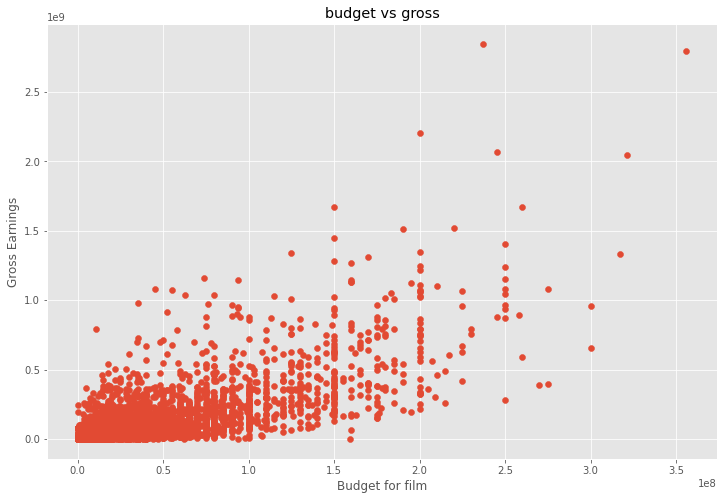

In [21]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('budget vs gross')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

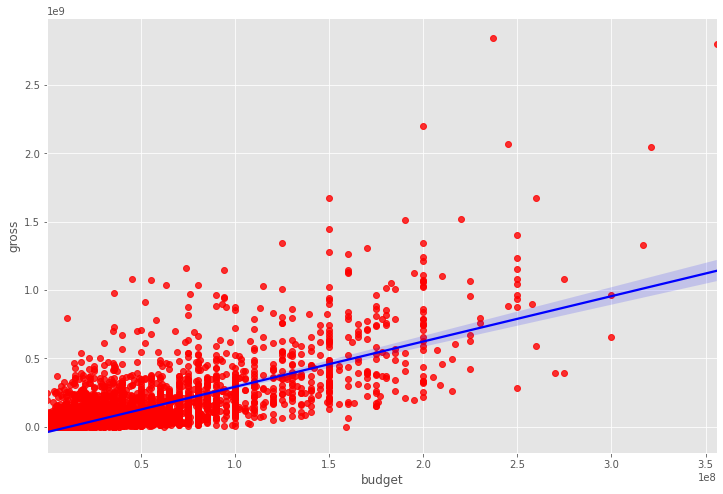

In [23]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [24]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [31]:
correlation_matrix = df.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

year     year       1.000000
         score      0.097936
         votes      0.222810
         budget     0.265578
         gross      0.252042
         runtime    0.120766
score    year       0.097936
         score      1.000000
         votes      0.409182
         budget     0.064541
         gross      0.182868
         runtime    0.399329
votes    year       0.222810
         score      0.409182
         votes      1.000000
         budget     0.421007
         gross      0.628713
         runtime    0.309166
budget   year       0.265578
         score      0.064541
         votes      0.421007
         budget     1.000000
         gross      0.711270
         runtime    0.265287
gross    year       0.252042
         score      0.182868
         votes      0.628713
         budget     0.711270
         gross      1.000000
         runtime    0.241335
runtime  year       0.120766
         score      0.399329
         votes      0.309166
         budget     0.265287
         gross

In [33]:
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

budget   score      0.064541
score    budget     0.064541
year     score      0.097936
score    year       0.097936
runtime  year       0.120766
year     runtime    0.120766
gross    score      0.182868
score    gross      0.182868
year     votes      0.222810
votes    year       0.222810
gross    runtime    0.241335
runtime  gross      0.241335
gross    year       0.252042
year     gross      0.252042
runtime  budget     0.265287
budget   runtime    0.265287
year     budget     0.265578
budget   year       0.265578
votes    runtime    0.309166
runtime  votes      0.309166
         score      0.399329
score    runtime    0.399329
votes    score      0.409182
score    votes      0.409182
votes    budget     0.421007
budget   votes      0.421007
gross    votes      0.628713
votes    gross      0.628713
budget   gross      0.711270
gross    budget     0.711270
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [35]:
high_corr = sorted_corr_pairs[sorted_corr_pairs > 0.5]
high_corr 

gross    votes      0.628713
votes    gross      0.628713
budget   gross      0.711270
gross    budget     0.711270
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

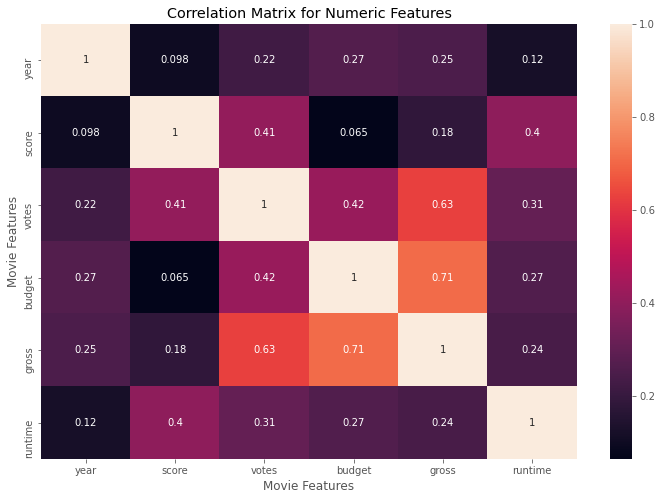

In [29]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()
